<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_10_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 10 
# Прикладная алгебра и численные методы
## Матричные нормы. Приближение матриц меньшего ранга

In [1]:
import numpy as np
import sympy
import scipy.linalg
import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
!python -m pip install scipy --upgrade

     |████████████████████████████████| 27.4MB 147kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [2]:
sympy.__version__, scipy.__version__, np.__version__

('1.7.1', '1.6.1', '1.19.5')

## Подчиненные (операторные) матричные нормы.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

scipy.linalg.norm(a, ord=None, axis=None, keepdims=False, check_finite=True)

если check_finite=True, проверяется, все ли элементы матрицы конечны  


#### Возможные значения параметра ord 
одинаково в numpy и scipy
$$
\begin{matrix}
ord &	norm\ for\ matrices\\
None &		Frobenius\ norm\\
‘fro’	 &	Frobenius\ norm\\
‘nuc’ &		nuclear\ norm\\
inf &		max(sum(abs(x),\ axis=1))\\
-inf &		min(sum(abs(x),\ axis=1))\\
0	 &	–\\
1	 &	max(sum(abs(x),\ axis=0))\\
-1 &		min(sum(abs(x),\ axis=0))\\
2	 &	2-norm\ (largest\ singular\ value)\\
-2 &		smallest\ singular\ value\\
other &		–
\end{matrix}
$$


Матричная норма 
$ \|A\|_{1}=\max \limits _{1\leq j\leq n}\sum _{i=1}^{m}|a_{ij}|$, подчинённая векторной норме$ \|x\|_{1}=\sum _{i=1}^{n}|x_{i}|$.

Матричная норма $\|A\|_{\infty }=\max \limits _{1\leq i\leq m}\sum _{j=1}^{n}|a_{ij}|$, подчинённая векторной норме $\|x\|_{\infty }=\max \limits _{1\leq i\leq n}|x_{i}|$.

Спектральная норма $\|A\|_{2}=\sup \limits _{\|x\|_{2}=1}\|Ax\|_{2}=\sup \limits _{(x,x)=1}{\sqrt {(Ax,Ax)}}={\sqrt {\lambda _{max}(A^{*}A)}}$, подчиненная векторной норме $\|x\|_{2}={\sqrt {\sum _{i=1}^{n}|x_{i}|^{2}}}$.

Норма Фробениуса $ \|A\|_{F} = \sqrt{\sum _{i, j}|a_{ij}|^2} = {\rm tr}(A^*A) = \sqrt{\sum _{i=1}^{n}\sigma_{i}^2}$

## Пример 1.
Вычислим матричные нормы $||M||_1$, $||M||_2$, $||M||_\infty$ и $||M||_F$  для матрицы 

$$
\left(
\begin{matrix}
1 & 3 & 5\\
2 & 5 & 8\\
3 & 7 & 11
\end{matrix}
  \right)
$$


In [3]:
M = [[1, 3, 5], [2, 5, 8], [3, 7, 11]]
for package in (np, scipy):
  display(package.__name__, *[('ord', item, '||M||', package.linalg.norm(M, ord=item)) for item in (1, 2, np.inf, 'fro')])

'numpy'

('ord', 1, '||M||', 24.0)

('ord', 2, '||M||', 17.518067568404707)

('ord', inf, '||M||', 21.0)

('ord', 'fro', '||M||', 17.52141546793523)

'scipy'

('ord', 1, '||M||', 24.0)

('ord', 2, '||M||', 17.518067568404707)

('ord', inf, '||M||', 21.0)

('ord', 'fro', '||M||', 17.52141546793523)

https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixBase.norm

В sympy реализованы нормы с такими же значениями ord, как в scipy и numpy:

norm(ord=None)

это метод в классе матриц.

## Пример 2
Вычислим нормы $||M||_1$, $||M||_2$, $||M||_\infty$ и $||M||_F$  матрицы Примера 1 с помощью sympy:


In [4]:
Msym = sympy.Matrix(M)
display([('ord', item, '||M||', [(Mnorm, round(Mnorm, 5)) for Mnorm in [Msym.norm(ord=item)]]) for  item in (1, 2, sympy.oo, 'fro')])

[('ord', 1, '||M||', [(24, 24)]),
 ('ord', 2, '||M||', [(sqrt(sqrt(94105)/2 + 307/2), 17.51807)]),
 ('ord', oo, '||M||', [(21, 21)]),
 ('ord', 'fro', '||M||', [(sqrt(307), 17.52142)])]

## Спектр матрицы - множество ее собственных значений.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html

numpy.linalg.eigvals(a)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html

scipy.linalg.eigvals(a, b=None, overwrite_a=False, check_finite=True, homogeneous_eigvals=False)


## Пример 3
Найдем собственные числа матрицы из файла A_10_3.xlsx

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving A_10_3.xlsx to A_10_3.xlsx
User uploaded file "A_10_3.xlsx" with length 12784 bytes


In [6]:
A3 = pd.read_excel(fn, index_col=0, header=0, dtype={'Name': int, 'Value': int}).values 

A3_spectr = numpy.linalg.eigvals(A3)
display(*A3_spectr)

(999.6319322682816+0j)

(15.544588050261174+109.26947516511581j)

(15.544588050261174-109.26947516511581j)

(88.71954071691479+31.229896226005277j)

(88.71954071691479-31.229896226005277j)

(78.16595494011501+0j)

(53.652504475303154+42.59017589133343j)

(53.652504475303154-42.59017589133343j)

(10.8819667049992+75.52752013123322j)

(10.8819667049992-75.52752013123322j)

(-102.1390320856124+40.62023986302754j)

(-102.1390320856124-40.62023986302754j)

(-99.78578669709361+20.64267357079272j)

(-99.78578669709361-20.64267357079272j)

(-19.761777313467+71.5172096845359j)

(-19.761777313467-71.5172096845359j)

(12.121686002207094+0j)

(-25.248735665312054+50.26721265487169j)

(-25.248735665312054-50.26721265487169j)

(-55.64610958258963+0j)

Получились в основном комплексные числа. Модули найдем с помощью abs, составим список модулей собственных значений и отсортируем его по возрастанию, послений элемент списка - максимальное собственное число.

In [7]:
A3_spectr_abs = abs(A3_spectr)
A3_spectr_abs.sort()
radiusA3 = A3_spectr_abs[-1]
display('спектральный радиус', radiusA3, 'спектр', A3_spectr_abs)

'спектральный радиус'

999.6319322682816

'спектр'

array([ 12.121686  ,  55.64610958,  56.25203393,  56.25203393,
        68.50192931,  68.50192931,  74.19729863,  74.19729863,
        76.30742753,  76.30742753,  78.16595494,  94.05563951,
        94.05563951, 101.89859272, 101.89859272, 109.91990612,
       109.91990612, 110.36961729, 110.36961729, 999.63193227])

Сингулярные числа матрицы можно найти с помощью scipy.linalg.svdvals

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html


## Пример 4
С помощью разложения SVD (scipy.linalg.svdvals) получим сингулярные числа матрицы Примера 3. Изобразим на комплексной плоскости сингулярные числа, собственные числа и окружность с радиусом, равным спектральному радиусу матрицы A3.

[1019.71326226  226.78433187  211.38641442  188.97939044  173.02870319
  162.90671788  148.57740324  145.38108335  126.59258294  124.4057928
  100.92702017   98.73307441   80.35492349   73.2819829    59.12720602
   44.6663829    35.08737985   23.68261836    9.10951098    3.26386598]


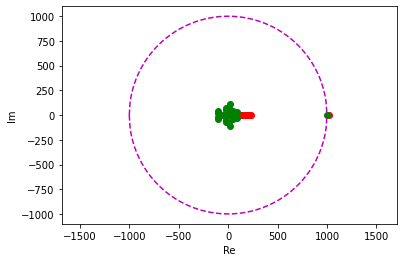

In [25]:
sing_val_A3 = scipy.linalg.svdvals(A3)
ax = plt.gca()  
radius2 = radiusA3**2
X = np.linspace(-radiusA3, radiusA3, 256)
Y = np.sqrt(radius2 - X**2)
ax.axis('equal')
ax.plot(sing_val_A3, np.zeros(len(sing_val_A3)), 'ro', np.real(A3_spectr), np.imag(A3_spectr), 'go', X, Y, 'm--', X, -Y, 'm--')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
print(sing_val_A3)

## Пример 5
Проверим утверждение $||A||_F = \sqrt{\sigma_1^2 + \sigma_1^2 + ... + \sigma_1^n}$ на матрице А3.


In [11]:
display(numpy.linalg.norm(sing_val_A3, ord=2), 
        numpy.linalg.norm(A3, ord='fro'))

1158.4355830170268

1158.4355830170273

## Пример 6
Проверим утверждение, что норма, согласованная с некоторой векторной нормой, равна числу, которое не меньше, чем спектральный радиус.

Вычислим нормы матрицы А3 и сравним их со спектральным радиусом.

In [14]:
display(*[('ord', item, '||A3|', [(normA3, normA3 >= radiusA3) for normA3 in (scipy.linalg.norm(A3, ord=item),)][0]) for item in (1, 2, np.inf, 'fro')], radiusA3)

('ord', 1, '||A3|', (1391.0, True))

('ord', 2, '||A3|', (1019.7132622612315, True))

('ord', inf, '||A3|', (1210.0, True))

('ord', 'fro', '||A3|', (1158.4355830170273, True))

999.6319322682816

## Приближенное разложение меньшего ранга
$$
A_{n\times n} = A_{n\times r} \times  A_{r\times n},\quad
r - \mbox{ ранг матрицы А}. 
$$
Пусть SVD-разложение матрицы $A = V\Sigma U^*$, где 
$$
\Sigma =
\left(
\begin{matrix}
\sigma_1 & 0 & 0 & ... & 0\\
0 & \sigma_2 & 0 & ... & 0 \\
0 &0 & ...& ... & 0\\
0 & ... & ...& ... & 0 \\
0 &0 & ... & ... & \sigma_n
\end{matrix}
\right),
$$
тогда $A_r = V\Sigma_r U^*$, где
$$
\Sigma_r  = 
\left(
\begin{matrix}
\sigma_1 & 0 & 0 & ... & ... & 0\\
0 & \sigma_2 & 0 & ... & ... &0 \\
0 &0 & ...& ... & ... & 0\\
0 & ... & ...& \sigma_r & ... & 0 \\
0 &0 & ... & ... &... & 0\\
 ...  & ...  & ... & ... &... &  ... \\
0 &0 & ... & ... &... & 0\\
\end{matrix}
\right),
$$
## Пример 7
Построим приближение ранга 1 для матрицы А7 в спектральной норме, найдем норму разности матриц.
Пусть SVD-разложение матрицы $A = V\Sigma U^*$, где 
$$
A_7 =
\left(
\begin{matrix}
6 & 0 & 6\\
0 & 12 & 6\\
6 & 6 & 9
\end{matrix}
\right),
$$


In [22]:
A7 = [[6, 0, 6], [0, 12, 6], [6, 6, 9]]
U7, sigmaA7, Vh7 = scipy.linalg.svd(A7)
Sigma7 = np.diag(sigmaA7)
UsVh7 = U7 @ Sigma7 @ Vh7
Sigma7_1 = np.zeros((3, 3))
Sigma7_1[0] = Sigma7[0]
A7r = U7 @ Sigma7_1 @ Vh7
display(U7, sigmaA7, Vh7, UsVh7, np.allclose(UsVh7, A7), A7r, scipy.linalg.norm(A7 - A7r))

array([[-0.33333333,  0.66666667, -0.66666667],
       [-0.66666667, -0.66666667, -0.33333333],
       [-0.66666667,  0.33333333,  0.66666667]])

array([1.80000000e+01, 9.00000000e+00, 4.94791776e-16])

array([[-0.33333333, -0.66666667, -0.66666667],
       [ 0.66666667, -0.66666667,  0.33333333],
       [-0.66666667, -0.33333333,  0.66666667]])

array([[ 6.00000000e+00,  2.92251872e-15,  6.00000000e+00],
       [-7.04209823e-16,  1.20000000e+01,  6.00000000e+00],
       [ 6.00000000e+00,  6.00000000e+00,  9.00000000e+00]])

True

array([[2., 4., 4.],
       [4., 8., 8.],
       [4., 8., 8.]])

9.0

## Круги Гершгорина
#### Первая теорема Гершгорина

Все собственные значения матрицы $A_{n\times n} = (a_{ij})$ содержатся в объединении кругов на комплексной плоскости
$$
|\lambda - a_{ii}| \le \sum_{k = 1, k \neq i}^n |a_{ik}|, \quad i = 1, ..., n.
$$

## Пример 8
$$
A_8 =
\left(
\begin{matrix}
1 & 2 & 0 & 0 & 0\\
3 & 1 & 2 & 0 & 0 \\
0 & 3 & 1 & 2 & 0\\
0 & 0 & 3 & 1 & 2 \\
0 &0 & 0 & 3 & 1
\end{matrix}
\right),
$$

[ 7.29371773 -3.57494429  3.46020426  1.3355524  -0.5145301 ]


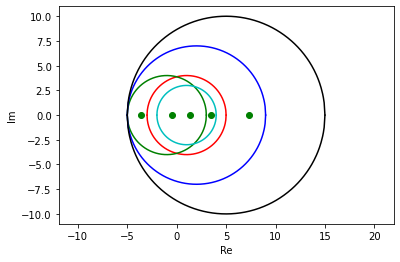

In [37]:
A8 = np.array([[1, 2, 0, 0, 0], [3, -1, 2, 0, 0 ], [0, 3, 2, 2, 0], [0, 0, 3, 5, 2 ], [0, 0, 0, 3, 1]])
n = A8.shape[0]
A8_spectr = numpy.linalg.eigvals(A8)
center = [A8[i, i] for i in range(n)]
R_i = [sum(A8[:, i]) for i in range(n)]
ax = plt.gca()  
ax.axis('equal')
style = ['r', 'g', 'b', 'k', 'c']*10
for i in  range(n):
  radius_i = R_i[i]
  center_i = center[i]
  style_i = style[i]
  X = np.linspace(center_i - radius_i, center_i + radius_i, 256)
  Y = np.sqrt(radius_i**2 - (X - center_i)**2)
  ax.plot(X, Y, style_i + '-', X, -Y, style_i + '-') 
ax.plot(np.real(A8_spectr), np.imag(A8_spectr), 'go')  
ax.set_xlabel('Re')
ax.set_ylabel('Im')
print(A8_spectr)